# Loan Data

- Problem statement: PeerLoanKart is an NBFC (non-banking financial company) that facilitates peer-to-peer loans. It connects people who need money (borrowers) with people who have money (investors). As an investor, you would want to invest in people who showed a profile of having a high probability of paying you back. Create a model that will help predict whether a borrower will repay the loan.


- Analysis to be done: Increase profits by up to 20% as NPAs will be reduced due to loan disbursal to creditworthy borrowers only.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [2]:
df = pd.read_csv("loan_borowwer_data.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [8]:
for col in df.columns:
    
    print(df[col].value_counts())
    print("\n")

1    7710
0    1868
Name: credit.policy, dtype: int64


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: int.rate, Length: 249, dtype: int64


317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: installment, Length: 4788, dtype: int64


11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: log.annual.inc, Length: 1987, dtype: int64


0.00     89
10.00    19
0.60     16
15.10    13
12.00    13
         ..
5.90      1
19.74     1
29

In [9]:
# "purpose" is the only categorical column that we need to get dummies for.

### Dummies for Categorical Variable and Train Test Split:

In [10]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [12]:
df = pd.get_dummies(df, columns=["purpose"])

In [13]:
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [14]:
# Features:

x = df.drop("not.fully.paid", axis= 1)

In [15]:
x.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [16]:
y = df["not.fully.paid"]

In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: not.fully.paid, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7662, 19)
(1916, 19)
(7662,)
(1916,)


### Scalling:

In [20]:
sc = StandardScaler()

In [21]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, columns= x_train.columns)
x_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492566,0.868707,0.049122,-1.535031,-0.172101,-0.498260,0.268636,-0.520199,-0.608169,-0.266751,-0.298831,-0.239131,-0.576848,-0.388102,-0.832847,-0.190014,-0.263089,4.497152,-0.25967
1,0.492566,-1.431963,-0.391757,0.475451,-0.948919,0.811133,-0.566438,-0.388802,-0.208769,-0.714472,-0.298831,-0.239131,-0.576848,2.576642,-0.832847,-0.190014,-0.263089,-0.222363,-0.25967
2,0.492566,-0.283480,-0.865503,0.385937,-0.837116,0.156437,-0.302347,-0.144915,0.882696,-0.266751,-0.298831,-0.239131,-0.576848,-0.388102,1.200701,-0.190014,-0.263089,-0.222363,-0.25967
3,0.492566,-1.083713,1.015832,0.203709,-0.616412,0.549255,-0.194484,0.805094,1.333743,-0.714472,-0.298831,-0.239131,1.733559,-0.388102,-0.832847,-0.190014,-0.263089,-0.222363,-0.25967
4,0.492566,-0.364985,-0.024503,-0.393163,0.935774,1.203951,0.992200,-0.514108,-1.437958,-0.266751,-0.298831,-0.239131,-0.576848,-0.388102,-0.832847,-0.190014,-0.263089,4.497152,-0.25967


In [22]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, columns= x_test.columns)
x_test.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-2.030187,1.187319,0.659518,-0.551198,0.279471,-1.414835,-0.302347,-0.253694,1.230450,0.628691,-0.298831,-0.239131,-0.576848,-0.388102,1.200701,-0.190014,-0.263089,-0.222363,-0.25967
1,0.492566,-0.153813,1.046473,0.362771,-0.247604,0.549255,-0.386254,-0.019038,-0.191553,0.628691,-0.298831,-0.239131,-0.576848,-0.388102,1.200701,-0.190014,-0.263089,-0.222363,-0.25967
2,0.492566,-0.290890,-0.578554,-0.956987,0.164763,-0.498260,-0.997593,-0.075759,1.354402,-0.714472,-0.298831,-0.239131,-0.576848,2.576642,-0.832847,-0.190014,-0.263089,-0.222363,-0.25967
3,-2.030187,1.561502,-1.021902,0.111011,2.259996,-1.022017,0.764486,-0.275868,-0.711462,1.076412,1.498378,-0.239131,1.733559,-0.388102,-0.832847,-0.190014,-0.263089,-0.222363,-0.25967
4,0.492566,-0.013031,-0.761673,0.315524,-1.249483,-0.236381,0.189107,-0.509921,-1.351880,-0.266751,1.498378,-0.239131,1.733559,-0.388102,-0.832847,-0.190014,-0.263089,-0.222363,-0.25967


### Models:

#### 1) Decision Tree:

In [35]:
dt = DecisionTreeClassifier(class_weight= "balanced")

In [36]:
param_dict = {"criterion" : ["gini", "entropy"],
             "splitter" : ["best","random"]}

In [37]:
grid_model = GridSearchCV(estimator= dt, param_grid= param_dict, cv= 5)

In [38]:
grid_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'splitter': ['best', 'random']})

In [39]:
grid_model.best_params_

{'criterion': 'gini', 'splitter': 'random'}

In [40]:
grid_model.best_estimator_

DecisionTreeClassifier(class_weight='balanced', splitter='random')

In [41]:
grid_model.best_score_

0.7482368740621897

In [42]:
pred = grid_model.predict(x_test)

In [43]:
accuracy_score(y_test, pred)

0.7453027139874739

In [44]:
precision_score(y_test, pred)

0.20952380952380953

In [45]:
recall_score(y_test, pred)

0.21639344262295082

In [46]:
confusion_matrix(y_test, pred)

array([[1362,  249],
       [ 239,   66]], dtype=int64)

In [47]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1611
           1       0.21      0.22      0.21       305

    accuracy                           0.75      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.75      0.75      0.75      1916



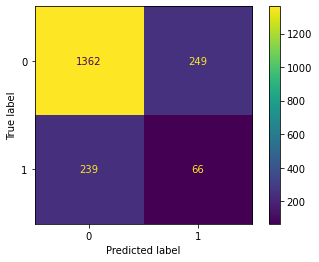

In [48]:
plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

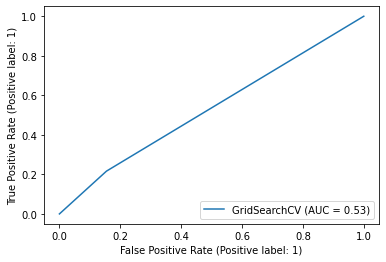

In [49]:
plot_roc_curve(grid_model, x_test, y_test)
plt.show()

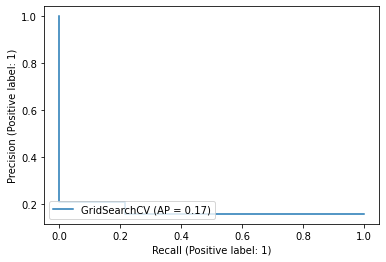

In [50]:
plot_precision_recall_curve(grid_model, x_test, y_test)
plt.show()

#### 2) Random Forest:

In [51]:
rfc = RandomForestClassifier(class_weight= "balanced")

In [52]:
param_dict = {"n_estimators" : [1,10,50,100,200],
             "criterion" : ["gini", "entropy"],
             "max_features" : [2,3,4],
             "bootstrap" : [True, False],
             "oob_score" : [True,False]}

In [53]:
grid_model = GridSearchCV(estimator= rfc, param_grid= param_dict, cv= 5)

In [54]:
grid_model.fit(x_train, y_train)

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_for

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_for

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_for

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_for

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Shailya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to n

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [2, 3, 4],
                         'n_estimators': [1, 10, 50, 100, 200],
                         'oob_score': [True, False]})

In [55]:
grid_model.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=4, oob_score=True)

In [56]:
grid_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 4,
 'n_estimators': 100,
 'oob_score': True}

In [57]:
grid_model.best_score_

0.8407725427879938

In [58]:
pred = grid_model.predict(x_test)

In [59]:
accuracy_score(y_test, pred)

0.842901878914405

In [60]:
precision_score(y_test, pred)

0.8333333333333334

In [61]:
recall_score(y_test, pred)

0.01639344262295082

In [62]:
confusion_matrix(y_test, pred)

array([[1610,    1],
       [ 300,    5]], dtype=int64)

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.83      0.02      0.03       305

    accuracy                           0.84      1916
   macro avg       0.84      0.51      0.47      1916
weighted avg       0.84      0.84      0.77      1916



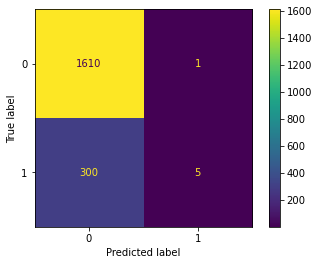

In [64]:
plot_confusion_matrix(grid_model, x_test, y_test)
plt.show()

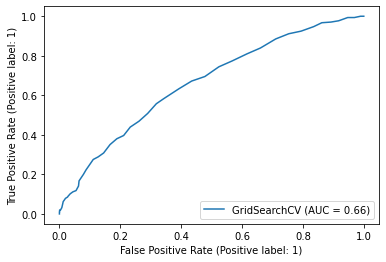

In [65]:
plot_roc_curve(grid_model, x_test, y_test)
plt.show()

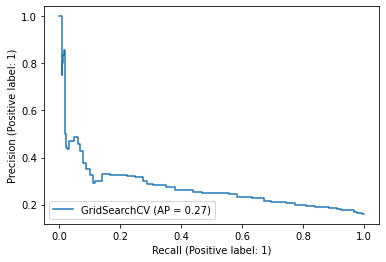

In [66]:
plot_precision_recall_curve(grid_model, x_test, y_test)
plt.show()

In [67]:
df["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [68]:
# Due to having very less observations for Class 1, Models Perform Poorly on Predicting Class 1.